# 몬테카를로 적분의 성능
Monte Carlo 적분은 확률적 샘플링을 통해 함수의 적분 값을 추정한다.

## 원리
    1. 무작위 샘플링:
    	• 적분 구간 [0, 1]에서 무작위로 샘플  x_i 를 생성합니다.
    	• Uniform 분포와 Beta 분포(매개변수  \alpha 와  \beta )를 사용합니다.
    2. 함수 값 평가:
    	• 샘플  x_i 를 함수  g(x) = 3x^2 에 대입하여 함수 값을 계산합니다.
    3. 평균 계산:
    	• 함수 값들의 평균을 계산합니다.
    4. 적분 값 추정:
    	• 적분 구간의 길이(1)를 곱하여 최종 적분 값을 추정합니다.


# 2.4.4 특정 확률 분포를 따르는 난수 발생기 (2024.03.14)
- $x = [0, 1] $
- $y = \sqrt{x} $

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [4]:
x = []
y = []
for i in range(1000000) :
    a = random.random()
    x.append(a)
    b = np.sqrt(a)
    y.append(b)


Text(0.5, 1.0, 'y')

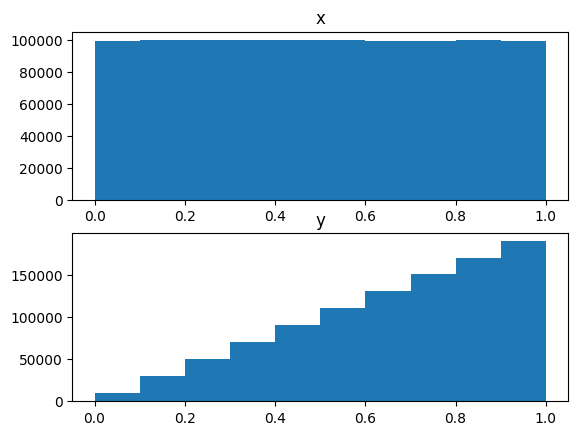

In [5]:
plt.subplot(2, 1, 1)
plt.hist(x)
plt.title('x')

plt.subplot(2, 1, 2)
plt.hist(y)
plt.title('y')

# 3개 비교하기

In [13]:
# 함수 정의
def g(x) :
    return 3 * (x ** 2)

        # Uniform 분포를 사용한 Monte Carlo 
        
        # sum = 0
        # N = 0
        # for i in range(10000000) :
        #     num = random.random()
        #     sum += g(num)
        #     N += 1
        # result = 1 / N * sum
        # print('uniform : ', result)

# Numpy
N = 10000000
samples_uniform = np.random.rand(N) 
sum_uniform = np.sum(g(samples_uniform)) 
result_uniform = sum_uniform / N 
print('Uniform 분포:', result_uniform)

Uniform 분포: 0.999333799783498


In [14]:
# 베타 분포에서 나온 난수를 베타 함수에 넣어서 계산하기
def beta(x, a, b) :
    return math.gamma(a+b) * ((x ** (a-1)) * ((1-x) ** (b-1))) / (math.gamma(a) * math.gamma(b))


        # N = 0
        # sum = 0
        # for i in range(10000000) :
        #     num = random.betavariate(2, 2)
        #     sum += g(num) / beta(num, 2, 2)
        #     N += 1
        # result = 1 / N * sum
        # print('beta : ', result)

# Numpy
samples_beta = np.random.beta(2, 2, N)  # Beta(2, 2) 분포를 따르는 난수 생성
g_values_beta = g(samples_beta) / beta(samples_beta, 2, 2)  # g(x) / Beta(x|2, 2) 값 계산
result_beta = np.mean(g_values_beta)  # Monte Carlo 적분 근사값 계산
print('Beta 분포:', result_beta)

Beta 분포: 1.0027125166462425


In [15]:
# f(y) = 2y 함수를 사용한 Monte Carlo 적분

def f(y) :
    return 2 * y

        # N = 0
        # sum = 0
        # for i in range(10000000) :
        #     num = math.sqrt(random.random())
        #     sum += g(num) / f(num)
        #     N += 1
        # result = 1 / N * sum
        # print('f(y)=2y : ', result)

# Numpy
samples_sqrt = np.sqrt(np.random.rand(N)) 
g_values_sqrt = g(samples_sqrt) / f(samples_sqrt)
result_sqrt = np.mean(g_values_sqrt)
print('f(y) = 2y:', result_sqrt)

f(y) = 2y: 1.0000576238221464


# 10번돌리기

In [9]:
import statistics

In [12]:
#함수 정의한것으로 10번 돌리기

def g(x) :
    return 3 * (x ** 2)
        
        # a_list = []
        # for i in range(10) :
        #     sum = 0
        #     N = 0
        #     for i in range(100000) :
        #         num = random.random()
        #         sum += g(num)
        #         N += 1
        #     result = 1 / N * sum
        #     a_list.append(result)
        
        # print('10번 돌린 리스트', a_list)
        # a_mean = statistics.mean(a_list)
        # print('10번 돌린 평균', a_mean)
        
        # sum = 0
        # for i in range(len(a_list)) :
        #     sum += (a_list[i]-a_mean) ** 2
        # a_se = 1 / (10-1) * sum
        # print('10번 돌린 분산', a_se)

# 시뮬레이션 횟수와 실험 횟수
simulations = 10
N = 100000

# 결과를 저장할 리스트 초기화
a_list = []

# Monte Carlo 시뮬레이션 반복
for _ in range(simulations):
    sum_result = 0
    for _ in range(N):
        num = random.random()
        sum_result += g(num)
    
    result = sum_result / N
    a_list.append(result)

# 결과 출력
print('10번 돌린 리스트:', a_list)

# 평균 계산
a_mean = np.mean(a_list)
print('10번 돌린 평균:', a_mean)

# 표준 오차 계산
a_se = np.std(a_list, ddof=1) / np.sqrt(simulations)
print('10번 돌린 표준 오차:', a_se)

10번 돌린 리스트: [1.0022330712940575, 0.9992229787799479, 1.0015810602577555, 1.0011238918991852, 1.000289466693124, 1.0041250804880077, 0.9993080035315334, 1.0011164831027433, 0.9966483154533905, 1.0008574149743439]
10번 돌린 평균: 1.0006505766474088
10번 돌린 표준 오차: 0.0006317100033259536


In [16]:
# 베타 분포에서 나온 난수를 베타 함수에 넣어서 계산하기
def beta(x, a, b) :
    return math.gamma(a+b) * ((x ** (a-1)) * ((1-x) ** (b-1))) / (math.gamma(a) * math.gamma(b))
        
        # b_list = []
        # for i in range(10) :
        #     N = 0
        #     sum = 0
        #     for i in range(100000) :
        #         num = random.betavariate(2, 2)
        #         sum += g(num) / beta(num, 2, 2)
        #         N += 1
        #     result = 1 / N * sum
        #     b_list.append(result)
        # print('10번돌린 리스트 : ', b_list)
        # b_mean = statistics.mean(b_list)
        # print('10번 돌린 평균', b_mean)
        
        # sum = 0
        # for i in range(len(b_list)) :
        #     sum += (b_list[i]-b_mean) ** 2
        # b_se = 1 / (10-1) * sum
        # print('10번 돌린 분산', b_se)

# 시뮬레이션 횟수와 실험 횟수
simulations = 10
N = 100000

# 결과를 저장할 리스트 초기화
b_list = []

# Monte Carlo 시뮬레이션 반복
for _ in range(simulations):
    sum_result = 0
    for _ in range(N):
        num = random.random()
        sum_result += g(num)
    
    result = sum_result / N
    b_list.append(result)

# 결과 출력
print('10번 돌린 리스트:', b_list)

# 평균 계산
b_mean = np.mean(b_list)
print('10번 돌린 평균:', b_mean)

# 표준 오차 계산
b_se = np.std(b_list, ddof=1) / np.sqrt(simulations)
print('10번 돌린 표준 오차:', b_se)

10번 돌린 리스트: [0.995691724125274, 1.0028720190478335, 1.0053004860723895, 0.998683818050908, 1.0036337004021885, 0.9996622897383926, 1.00017857426228, 0.9996881534397436, 0.9989102370127906, 1.0038533338659914]
10번 돌린 평균: 1.0008474336017792
10번 돌린 표준 오차: 0.0009365332881630356


In [17]:
def f(y) :
    return 2 * y

        # c_list = []
        # for i in range(10) :
        #     N = 0
        #     sum = 0
        #     for i in range(10000000) :
        #         num = math.sqrt(random.random())
        #         sum += g(num) / f(num)
        #         N += 1
        
        #     result = 1 / N * sum
        #     c_list.append(result)
        # print('10번돌린 리스트 : ', c_list)
        # c_mean = statistics.mean(c_list)
        # print('10번 돌린 평균', c_mean)
        
        # sum = 0
        # for i in range(len(c_list)) :
        #     sum += (c_list[i]-c_mean) ** 2
        # c_se = 1 / (10-1) * sum
        # print('10번 돌린 분산', c_se)

# 시뮬레이션 횟수와 실험 횟수
simulations = 10
N = 100000

# 결과를 저장할 리스트 초기화
c_list = []

# Monte Carlo 시뮬레이션 반복
for _ in range(simulations):
    sum_result = 0
    for _ in range(N):
        num = random.random()
        sum_result += g(num)
    
    result = sum_result / N
    c_list.append(result)

# 결과 출력
print('10번 돌린 리스트:', c_list)

# 평균 계산
c_mean = np.mean(a_list)
print('10번 돌린 평균:', c_mean)

# 표준 오차 계산
c_se = np.std(c_list, ddof=1) / np.sqrt(simulations)
print('10번 돌린 표준 오차:', c_se)

10번 돌린 리스트: [1.0006112862838692, 1.002601786868576, 1.002273388662437, 0.9979825466319665, 0.9985185921782783, 1.0041586066851393, 0.9985341472716098, 1.001942081718315, 1.0023116451872014, 0.9978698036755668]
10번 돌린 평균: 1.0006505766474088
10번 돌린 표준 오차: 0.0007229762465129826


# 결과 : 2번이 분산이 제일 크고, 3번이 분산이 제일 작음